### This Project is to predict sales revenue based on advertising spending through media such as TV, radio, and newspaper

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
%matplotlib inline

Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#View Dataframe Summary
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# Spliting the Data Frame into Train Data & Labels

X = df[['TV','radio','newspaper']]
y = df['sales']

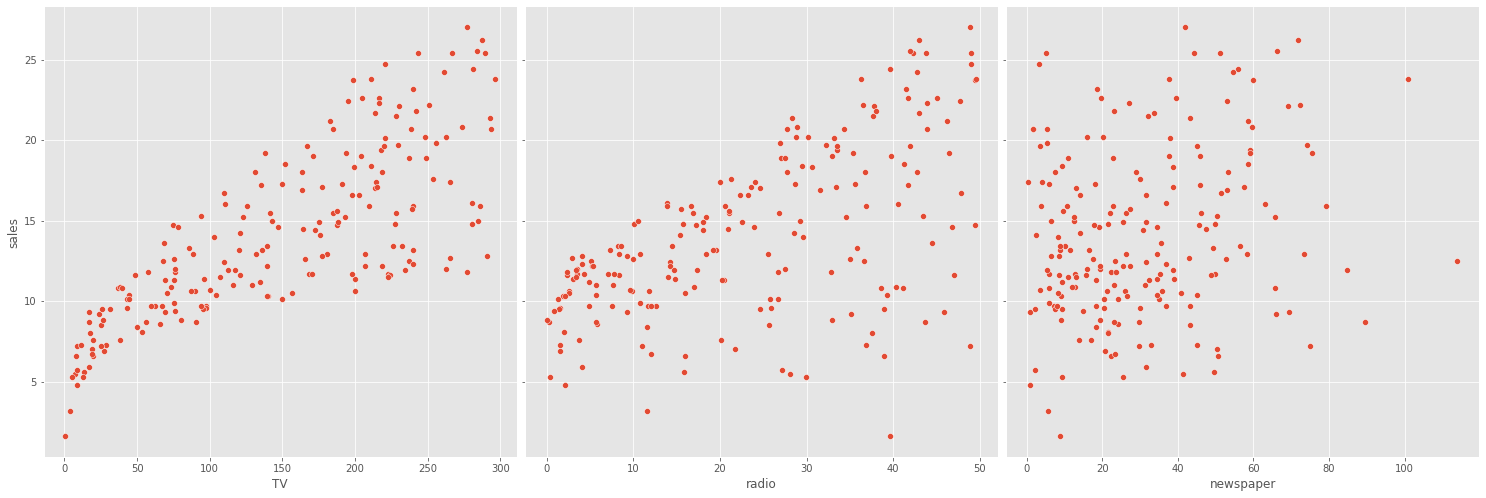

In [5]:
# Visualizing the relationship between variables and sales using seaborn

sns.pairplot(df, x_vars = X.columns.tolist(), y_vars = 'sales', height = 7, aspect = 1);

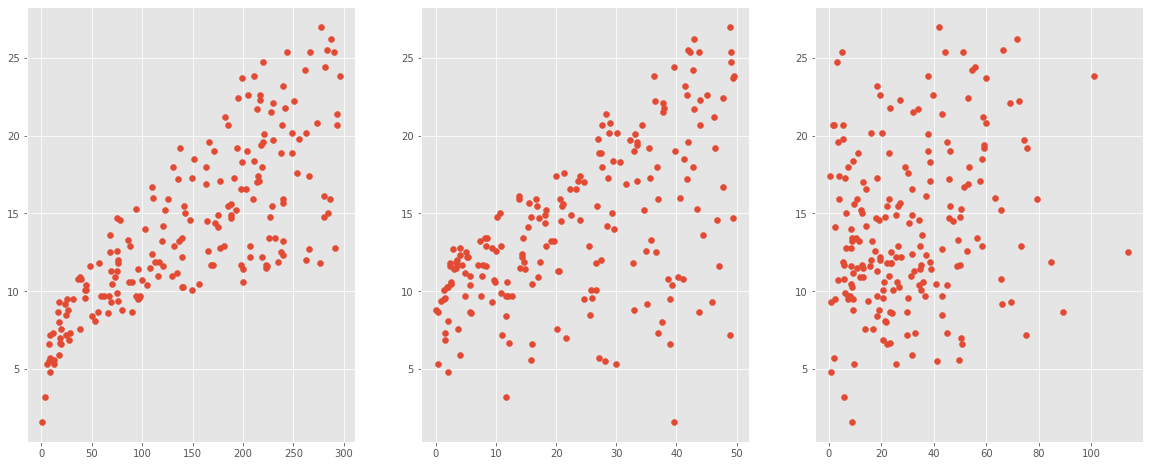

In [6]:
# Visualizing the relationship between variables and sales using Matplotlib


fig, ax = plt.subplots(1 , 3, figsize = (20,8))
for i in range(len(ax)):
    ax[i].scatter(X.iloc[:,i], y)


In [7]:
# Creating the 1st Model to view the values of weights (coefficients) & Intercept.

model1 = LinearRegression()
model1.fit(X, y)

print(model1.intercept_)
print(model1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [8]:
# Viewing the R2 Score for this model.

model1_pred = model1.predict(X)
r2_score(y, model1_pred)

0.8972106381789522

In [9]:
list(zip(X.columns,model1.coef_)) # view the optimimal coefficients for each feature for this model.

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820453),
 ('newspaper', -0.0010374930424762834)]

#### Feature Selection : 
It's obvious in the above scatter plot that the Newspaper ads are not that much effective.

In [10]:
# Creating the 2nd Model after removing the Newspaper to check if it will better fit.

model2 = LinearRegression()
model2.fit(X[['TV','radio']],y)
model2_pred = model2.predict(X[['TV','radio']])
r2_score(y, model2_pred)

0.8971942610828956

#### By Comparing the R2 Score for model1 & model2, we can see that almost no change in the score which means "Newspaper" feature have very small effect so the decision should be to eliminate this feature from the model.

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

model3 = LinearRegression()
model3.fit(X_train,y_train)
model3_pred = model3.predict(X_test)

print(f"R2_Score: {r2_score(y_test,model3_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(model3_pred,y_test))}")


R2_Score: 0.9156213613792231
Root Mean Squared Error: 1.4046514230328961


In [12]:
X_Revised_Features = df[['TV','radio']]

X_train, X_test, y_train, y_test = train_test_split(X_Revised_Features, y, random_state = 1)

model4 = LinearRegression()
model4.fit(X_train,y_train)
model4_pred = model4.predict(X_test)

print(f"R2_Score: {r2_score(y_test,model4_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(model4_pred,y_test))}")

R2_Score: 0.9176214942248907
Root Mean Squared Error: 1.3879034699382893


#### By comparing the R2 Score & Error of the above model3 "Including News paper" & Model4 "Execluding Newspaper", we can confirm that model4 "execluding Newspaper"  perform better because the score of Model4 is better and the Error is less in model4 than model3.

c:\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


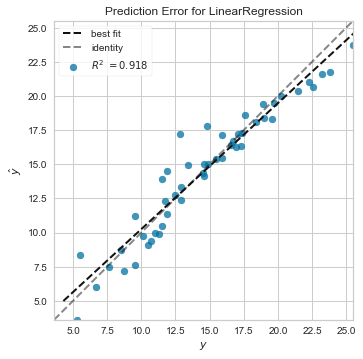

In [13]:
# visualizing model 4 fit.

from yellowbrick.regressor import PredictionError 

viz = PredictionError(model4).fit(X_train,y_train)
viz.score(X_test,y_test)
viz.poof();

#### Testing if we can get better result by adding one more feature which derived from multiplication of the other two features.

In [14]:
#Feature Engineering
df['interaction'] = df['TV'] * df['radio']

X_Improved_Features = df[['TV', 'radio', 'interaction']]

X_train, X_test, y_train, y_test = train_test_split(X_Improved_Features,y, random_state = 1)

model5 = LinearRegression()
model5.fit(X_train,y_train)
model5_pred = model5.predict(X_test)

print(f"R2 Score : {r2_score(y_test, model5_pred)}")
print(f"Mean Squared Error : {np.sqrt(mean_squared_error(model5_pred, y_test))}")


R2 Score : 0.978973681468126
Mean Squared Error : 0.7011871137164327


#### It was a good step to add the "Interaction" Feature cause the R2 Score is better & Error is less in model5 then model4 

c:\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


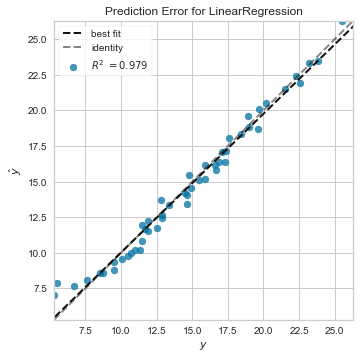

In [15]:
viz = PredictionError(model5)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof();